In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import load
import time

%matplotlib inline
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':100})

In [2]:
# load array
array_accuracy = []
array_f2 = []

resultados_svm = load('resultados_svm.npy', allow_pickle=True)
resultados_mlp = load('resultados_mlp.npy', allow_pickle=True)
resultados_rl = load('resultados_rl.npy', allow_pickle=True)
resultados_knn = load('resultados_knn.npy', allow_pickle=True)
resultados_mlm = load('resultados_mlm.npy', allow_pickle=True)

array_accuracy.append(resultados_svm.item().get('accuracy'))
array_accuracy.append(resultados_mlp.item().get('accuracy'))
array_accuracy.append(resultados_rl.item().get('accuracy'))
array_accuracy.append(resultados_knn.item().get('accuracy'))
array_accuracy.append(resultados_mlm.item().get('accuracy'))
array_accuracy = np.asarray(array_accuracy).T
#array_accuracy

array_f2.append(resultados_svm.item().get('f2'))
array_f2.append(resultados_mlp.item().get('f2'))
array_f2.append(resultados_rl.item().get('f2'))
array_f2.append(resultados_knn.item().get('f2'))
array_f2.append(resultados_mlm.item().get('f2'))
array_f2 = np.asarray(array_f2).T
#array_f2

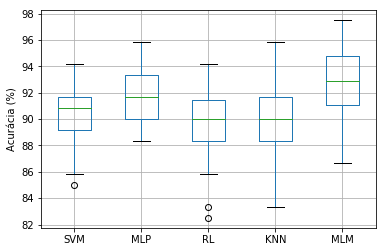

In [3]:
df_accuracy = pd.DataFrame(array_accuracy*100,columns=['SVM','MLP', 'RL', 'KNN', 'MLM'])
boxplot_accuracy = df_accuracy.boxplot(column=['SVM','MLP', 'RL', 'KNN', 'MLM'])
plt.ylabel('Acurácia (%)')
plt.savefig('acuracia.pdf')

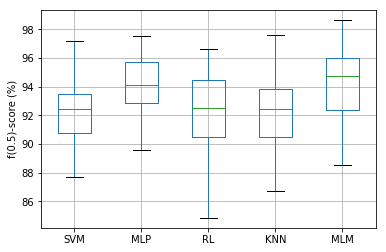

In [4]:
df_f2 = pd.DataFrame(array_f2*100,columns=['SVM','MLP', 'RL',  'KNN', 'MLM'])
boxplot_f2 = df_f2.boxplot(column=['SVM','MLP', 'RL', 'KNN', 'MLM'], grid = True)
plt.ylabel('f(0.5)-score (%)')
plt.savefig('f05_score.pdf')

In [5]:
metricas = {
    'Acurácia': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('accuracy'), axis=0)*100, np.std(resultados_svm.item().get('accuracy'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('accuracy'), axis=0)*100, np.std(resultados_mlp.item().get('accuracy'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('accuracy'), axis=0)*100, np.std(resultados_rl.item().get('accuracy'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('accuracy'), axis=0)*100, np.std(resultados_knn.item().get('accuracy'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('accuracy'), axis=0)*100, np.std(resultados_mlm.item().get('accuracy'), axis=0)*100)
        
    ],
    'Precisão': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('precision'), axis=0)*100, np.std(resultados_svm.item().get('precision'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('precision'), axis=0)*100, np.std(resultados_mlp.item().get('precision'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('precision'), axis=0)*100, np.std(resultados_rl.item().get('precision'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('precision'), axis=0)*100, np.std(resultados_knn.item().get('precision'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('precision'), axis=0)*100, np.std(resultados_mlm.item().get('precision'), axis=0)*100)
    ],
    'Sensitividade': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('recall'), axis=0)*100, np.std(resultados_svm.item().get('recall'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('recall'), axis=0)*100, np.std(resultados_mlp.item().get('recall'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('recall'), axis=0)*100, np.std(resultados_rl.item().get('recall'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('recall'), axis=0)*100, np.std(resultados_knn.item().get('recall'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('recall'), axis=0)*100, np.std(resultados_mlm.item().get('recall'), axis=0)*100)
        
    ],
    'Especificidade': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('specificity'), axis=0)*100, np.std(resultados_svm.item().get('specificity'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('specificity'), axis=0)*100, np.std(resultados_mlp.item().get('specificity'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('specificity'), axis=0)*100, np.std(resultados_rl.item().get('specificity'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('specificity'), axis=0)*100, np.std(resultados_knn.item().get('specificity'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('specificity'), axis=0)*100, np.std(resultados_mlm.item().get('specificity'), axis=0)*100)
        
    ],
    'fb-score': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('f2'), axis=0)*100, np.std(resultados_svm.item().get('f2'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('f2'), axis=0)*100, np.std(resultados_mlp.item().get('f2'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('f2'), axis=0)*100, np.std(resultados_rl.item().get('f2'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('f2'), axis=0)*100, np.std(resultados_knn.item().get('f2'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('f2'), axis=0)*100, np.std(resultados_mlm.item().get('f2'), axis=0)*100)
        
    ]
}
indices=['SVM', 'MLP', 'RL', 'KNN', 'MLM']
df = pd.DataFrame(data=metricas, index = indices)
df

,Acurácia,Especificidade,Precisão,Sensitividade,fb-score
SVM,90.38 $\pm$ 2.19,72.34 $\pm$ 8.18,91.40 $\pm$ 2.77,96.36 $\pm$ 1.90,92.33 $\pm$ 2.17
MLP,91.58 $\pm$ 2.04,80.97 $\pm$ 7.72,93.89 $\pm$ 2.54,95.09 $\pm$ 2.57,94.09 $\pm$ 1.87
RL,89.72 $\pm$ 2.53,73.97 $\pm$ 9.71,91.72 $\pm$ 3.36,95.01 $\pm$ 2.69,92.32 $\pm$ 2.58
KNN,89.85 $\pm$ 2.81,72.05 $\pm$ 9.36,91.28 $\pm$ 3.00,95.73 $\pm$ 2.37,92.11 $\pm$ 2.44
MLM,92.77 $\pm$ 2.35,79.35 $\pm$ 8.76,93.51 $\pm$ 2.91,97.21 $\pm$ 1.47,94.20 $\pm$ 2.33


In [6]:
#plt.boxplot(df_accuracy.T, labels=['SVM','MLP', 'RL', 'GBDT', 'KNN'], boxprops=dict(color='black'))
#plt.title('Desempenho dos Modelos');
#plt.xlabel('Algoritmo')
#plt.ylabel('Acurácia (%)')
#plt.savefig('acuracia.pdf')

In [7]:
#plt.boxplot(df_f2.T, labels=['SVM','MLP', 'RL', 'GBDT', 'KNN'], boxprops=dict(color='black'))
#plt.title('Desempenho dos Modelos');
#plt.xlabel('Algoritmo')
#plt.ylabel('f(0.5(-score (%)')
#plt.savefig('f05_score.pdf')

# Matriz de confusão

In [8]:
import os
import sys
sys.path.insert(0, os.path.abspath('../Util'))
from dados import ProcessarDados
procData = ProcessarDados("../dataset/norm_bin_10_FEATURES_M17_CM6b_TH199.csv")

# SVM

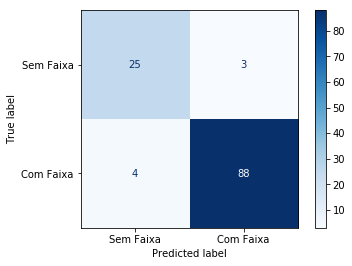

[[25  3]
 [ 4 88]]
Métricas:
	Acurácia: 94.17
	Precisão: 96.70
	Sensitividade: 95.65
	Especificidade: 89.29
	Fb-score: 96.49
Parametros:
{'C': 10, 'Gamma': 0.03, 'Kernel': 'rbf'}


In [16]:
# acessando o melhor SVM
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter

index_best_svm = np.argmax(resultados_svm.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout(0.2, index_best_svm)

best_svm_params = resultados_svm.item().get('params')[index_best_svm]
SVM = svm.SVC(random_state = index_best_svm, C = best_svm_params['C'], gamma = best_svm_params['Gamma'], kernel = best_svm_params['Kernel'])
SVM.fit(X_train, y_train)

#testando o modelo
y_pred = SVM.predict(X_test)
plot_confusion_matrix(SVM, X_test, y_test, display_labels = ['Sem Faixa', 'Com Faixa'], cmap ='Blues')
plt.show()

cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_svm.item().get('params')[index_best_svm])

# MLP

C:\Users\fadell\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


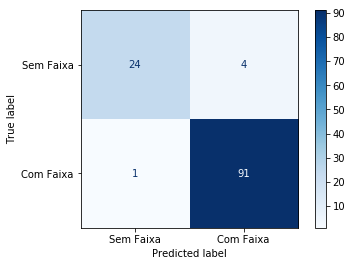

[[24  4]
 [ 1 91]]
Métricas:
	Acurácia: 95.83
	Precisão: 95.79
	Sensitividade: 98.91
	Especificidade: 85.71
	Fb-score: 96.40
Parametros:
{'Activation': 'relu', 'Alpha': 0.1, 'Solver': 'lbfgs', 'hidden_layer_sizes': 100}


In [10]:
# acessando o melhor MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter

index_best_mlp = np.argmax(resultados_mlp.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout(0.2, index_best_mlp)

best_mlp_params = resultados_mlp.item().get('params')[index_best_mlp]
MLP = MLPClassifier(random_state = index_best_mlp, activation = best_mlp_params['Activation'], alpha = best_mlp_params['Alpha'], solver = best_mlp_params['Solver'], hidden_layer_sizes = best_mlp_params['hidden_layer_sizes'])
MLP.fit(X_train, y_train)

#testando o modelo
y_pred = MLP.predict(X_test)
plot_confusion_matrix(MLP, X_test, y_test, display_labels = ['Sem Faixa', 'Com Faixa'], cmap ='Blues')
plt.show()

cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_mlp.item().get('params')[index_best_mlp])

# RL - Manual

[[23  2]
 [ 4 91]]
Métricas:
	Acurácia: 95.00
	Precisão: 97.85
	Sensitividade: 95.79
	Especificidade: 92.00
	Fb-score: 97.43
Parametros:
{'alpha': 0.1}


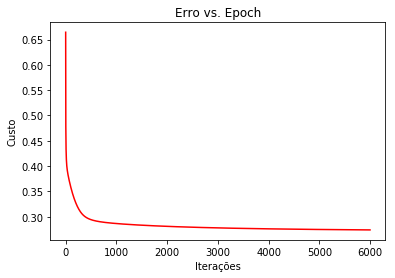

In [11]:
#IMPORTAR BIBLIOTECAS UTILIZADAS

import numpy as np
import pandas as pd
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#DEFINIR FUNCAO LOGISTICA (SIGMOID) PARA PREVER A PROBABILIDADE 
def sigmoid(w,X):
    z = np.dot(X,w)
    return 1 / (1 + np.exp(-z))

#DEFINIR FUNCAO PARA CLASSIFICAR
def classificar(y, limiar=0.5):
    return (y > limiar)*1

#DEFINIR FUNCAO CUSTO UTILIZANDO ENTROPIA CRUZADA
def entropiaCruzada(previsto,y):
    return (-y * np.log(previsto) - (1 - y) * np.log(1 - previsto)).mean()

#DEFINIR FUNCAO GRADIENTE DESCENDENTE PARA ATUALIZAR OS PARAMÊTROS w
def gradienteDescendente(w, X, y, alpha):
    previsto = sigmoid(w,X)
    erro = previsto - y
    gradiente = np.dot(X.T, erro) / len(X)
    w -= alpha*gradiente

index_best_rl = np.argmax(resultados_rl.item().get('accuracy'))

X_treino, X_teste, y_treino, y_teste = procData.holdout(0.2, index_best_rl)

best_rl_params = resultados_rl.item().get('params')[index_best_rl]

#ALTERANDO DIMENSÃO DE Y PARA D=1
y_treino = y_treino.reshape(480,)
y_teste = y_teste.reshape(120,)

#ADICIONAR ATRIBUTOS IGUAIS A 1 EM X0
X_treino = np.c_[np.ones(X_treino.shape[0]), X_treino]
X_teste = np.c_[np.ones(X_teste.shape[0]), X_teste]

#INICIALIZAR W (THETA) DE FORMA RANDOMICA e OTIMIZAR PARÂMETROS 
w = np.random.rand(X_treino.shape[1])
epoch = 6000
custo = np.zeros(epoch)
for i in range(epoch):
    custo[i] = entropiaCruzada(sigmoid(w,X_treino),y_treino)
    gradienteDescendente(w,X_treino,y_treino,1)
    

fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), custo, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')

#testando o modelo
y_pred = classificar(sigmoid(w, X_teste))
cm  = confusion_matrix(y_teste, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_teste, y_pred)
precision = metrics.precision_score(y_teste, y_pred)
recall = metrics.recall_score(y_teste, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_rl.item().get('params')[index_best_rl])


# RL - LIB

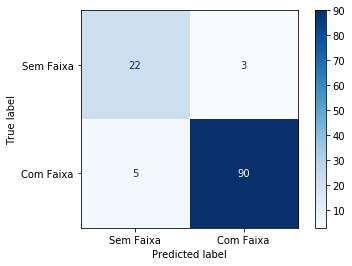

[[22  3]
 [ 5 90]]
Métricas:
	Acurácia: 93.33
	Precisão: 96.77
	Sensitividade: 94.74
	Especificidade: 88.00
	Fb-score: 96.36
Parametros:
{'alpha': 0.1}


In [12]:
# acessando o melhor RL
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter
#!python -m pip install --user scikit-mlm

from skmlm import NN_MLM, MLMC

index_best_rl = np.argmax(resultados_rl.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout(0.2, index_best_rl)

best_rl_params = resultados_rl.item().get('params')[index_best_rl]
RL = LogisticRegression(random_state = index_best_rl, tol = best_rl_params['alpha'])
RL.fit(X_train, y_train)

#testando o modelo
y_pred = RL.predict(X_test)
plot_confusion_matrix(RL, X_test, y_test, display_labels = ['Sem Faixa', 'Com Faixa'], cmap ='Blues')
plt.show()

cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_rl.item().get('params')[index_best_rl])

# KNN

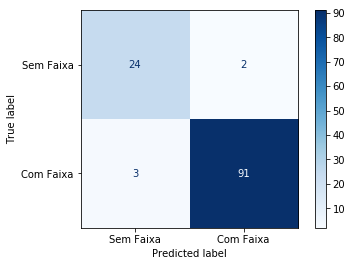

[[24  2]
 [ 3 91]]
Métricas:
	Acurácia: 95.83
	Precisão: 97.85
	Sensitividade: 96.81
	Especificidade: 92.31
	Fb-score: 97.64
Parametros:
{'n_neighbors': 3, 'p': 1}


In [17]:
# acessando o melhor KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter

index_best_knn = np.argmax(resultados_knn.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout(0.2, index_best_knn)

best_knn_params = resultados_knn.item().get('params')[index_best_knn]
KNN = KNeighborsClassifier(n_neighbors=best_knn_params['n_neighbors'], p=best_knn_params['p'], metric='minkowski')
KNN.fit(X_train, y_train)

#testando o modelo
y_pred = KNN.predict(X_test)
plot_confusion_matrix(KNN, X_test, y_test, display_labels = ['Sem Faixa', 'Com Faixa'], cmap ='Blues')
plt.show()

cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_knn.item().get('params')[index_best_knn])

# MLM

In [14]:
# acessando o melhor MLM
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter
#!python -m pip install --user scikit-mlm

from skmlm import NN_MLM, MLMC

index_best_mlm = np.argmax(resultados_mlm.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout(0.2, index_best_mlm)

best_mlm_params = resultados_mlm.item().get('params')[index_best_mlm]
MLM = NN_MLM(rp_number = best_mlm_params['rp_number'], random_state=index_best_mlm)
MLM.fit(X_train, y_train)

#testando o modelo
y_pred = MLM.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_mlm.item().get('params')[index_best_mlm])

[[27  2]
 [ 1 90]]
Métricas:
	Acurácia: 97.50
	Precisão: 97.83
	Sensitividade: 98.90
	Especificidade: 93.10
	Fb-score: 98.04
Parametros:
{'rp_number': 383}
